# Learning Regression with Regularization and Cross Validation
Regularized Linear Regression using Gradient Descent Algorithm

Read more at

https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a

<h3> Gradient Descent Algorithm with Regularization </h3>
<p>
We start with assumpution equation (Called hypothesis) which can fit above data points.   
<p>
$h(x) = w_0 + w_1 x$
</p> 
The two coefficients with initial guess (i.e. $w_0$ and $w_1$) of $h(x)$ will be fed into the algorithm.
Then Program will start from initial guess and then iterate steps to find the best fit.

<p>
 Our objective is to minimize Loss.
    <p>
 $ L(W)=   \hat{Y}-Y$  Where  $\hat{Y}=h(X)$
 </p>
Since Loss can negative or postive, we need to minimize the absolute values ( OR Mean squared) Loss so we define Loss/Cost function as follows

<h3>Cost/Loss Function with Regularization</h3>
We can measure the accuracy of our hypothesis function by using a cost function. This takes an average difference (actually a fancier version of an average) of all the results of the hypothesis with inputs from x's and the actual output y's.

$L(W) = \dfrac {1}{2n} \displaystyle \sum _{i=1}^n \left ( \hat{Y}_{i}- Y_{i} \right)^2+\frac{1}{n} \frac{\lambda}{2} \sum_{j} w_{j}^{2}$
<p>
$L(w_0, w_1)  = \dfrac {1}{2n} \displaystyle \sum _{i=1}^n \left (h(x_{i}) - y_{i} \right)^2 +\frac{1}{n} \frac{\lambda}{2}  \sum_{j} w_{j}^{2}$ 

This Loss/cost function is also called the "Squared error function", or "Mean squared error". The mean is halved $\left(\frac{1}{2}\right)$as a convenience for the computation of the gradient descent, as the derivative term of the square function will cancel out the $\frac{1}{2}$  term.

We minimize Loss by taking the derivative (the tangential line to a function) of our cost/loss function. The slope of the tangent is the derivative at that point and it will give us a direction to move towards. We make steps down the cost/loss function in the direction with the steepest descent. The size of each step is determined by the parameter α($alpha$), which is called the learning rate. The direction in which the step is taken is determined by the partial derivative of $L(w_0,w_1)$. 

The gradient descent algorithm is:

repeat until convergence:<p>
{<p>
&nbsp;&nbsp;    $w_0 := w_0 - \alpha \frac{\partial}{\partial w_0} L(w_0, w_1) + \frac{\lambda}{n} \sum_{j} w_{j}$<p>
&nbsp;&nbsp;    $w_1 := w_1 - \alpha \frac{\partial}{\partial w_1} L(w_0, w_1) + \frac{\lambda}{n} \sum_{j} w_{j}$<p>
}

OR<p>
$\begin{align*} \text{repeat until convergence: } \lbrace & \newline w_0 := & w_0 - \alpha \frac{1}{n} \sum\limits_{i=1}^{n}(h_w(x_{i}) - y_{i}) + \frac{\lambda}{n} \sum_{j} w_{j}\newline w_1 := & w_1 - \alpha \frac{1}{n} \sum\limits_{i=1}^{n}\left((h_w(x_{i}) - y_{i}) x_{i}\right) + \frac{\lambda}{n} \sum_{j} w_{j}\newline \rbrace& \end{align*}$

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


## Data

In [2]:
X=np.array([[-15.94,-29.15,36.19,37.49,-48.06,-8.94,15.31,
             -34.71,1.39,-44.38,7.01,22.76]]).T
Y=np.array([[2.13,1.17,34.36,36.84,2.81,2.12,14.71,
             2.61,3.74,3.73,7.63,22.75,]]).T
Xval=np.array([[-16.7,-14.6,34.5,-47.0,37.0,-40.7,-4.5,26.5,-42.8,25.4,-31.1,27.3
                ,-3.3,-1.8,-40.7,-50.0,-17.4,3.6,7.1,46.3,14.6]]).T
Yval=np.array([[4.2,4.1,31.9,10.6,31.8,5.0,4.5,22.3,-4.4,20.5,
                3.9,19.4,4.9,11.1,7.5,1.5,2.7,10.9,8.3,52.8,13.4]]).T
Xtest=np.array([[-33.3,-37.9,-51.2,-6.1,21.3,-40.3,-14.5,32.6,13.4,44.2,-1.1,
        -12.8,34.1,39.2,2.0,29.6,-23.7,-9.0,-55.9,-35.7,9.5]]).T
Ytest=np.array([[3.3,5.4,0.1,6.2,17.1,0.8,2.8,28.6,17.0,55.4,4.1,8.3,
        31.3,39.2,8.1,24.1,2.5,6.6,6.0,4.7,10.8]]).T

# Helper Functions

In [3]:
from sklearn.preprocessing import PolynomialFeatures

def mapFeature(X,degree):
    out= PolynomialFeatures(degree=degree).fit_transform(X)
    return out

In [4]:
from sklearn.preprocessing import StandardScaler

def featureNormalize(X):
    scaler=StandardScaler().fit(X)
    X_norm = scaler.transform(X)
    return X_norm, scaler

In [5]:
def computeCost(weights,X,Y,regLambda):
    n = X.shape[0]
    weights.shape = (X.shape[1],1)

    Yhat=np.matmul( X,weights)                      #Hypothesis
    err=Yhat-Y
    errSqr=err**2
    J=(1.0/(2.0*n))* np.sum(errSqr)
    
    
    regularized_weights=np.concatenate((np.zeros((1,1)) , weights[1:,:]),axis=0)
    J=J +regLambda* (1.0/(2.0*n)) *(np.sum(regularized_weights**2))
 
    
    return J


In [6]:


def gradientDescent(X, Y, weights, alpha, iterations,degree,regLambda):        
    n=len(Y)
    I=np.zeros((iterations,1),dtype=float)
    J=np.zeros((iterations,1),dtype=float)
    for k in range(iterations):
        
        Yhat=np.matmul( X,weights)                      #Hypothesis
        err=Yhat-Y
        d=np.matmul(err.T,X)  
        g=  alpha*((1.0/n)*d)              #Derivative
        g=g.T     #Itrations  
        regularized_weights=np.concatenate((np.zeros((1,1)) , weights[1:,:]),axis=0)
        g=g+ (regLambda/n)*regularized_weights 
        I[k]=k*1.0
        J[k]=computeCost(weights,X,Y,regLambda)
        weights=weights-g
    
    
    
    #plt.plot(I, J,color='r')
    return weights


In [7]:
def predict(weights,X,scaler,degree):
    XS=scaler.transform(X)
    pX=mapFeature(XS,degree)
    Py=np.matmul(pX, weights)
    return Py

# Plotting With Different Regularization Parameters and degree

In [8]:
def plotHypothesis(weights,X,Y,regLambda,scaler,degree):
    plt.scatter(X,Y) 
    plt.title("Lambda="+str(regLambda)+",Degree="+str(degree))
    x_min, x_max = X[:, 0].min()-1 , X[:, 0].max()+1 
    u = np.linspace(x_min, x_max, 100)
    u.shape=(len(u),1) 
    v=predict(weights,u,scaler,degree) 
    plt.plot(u, v,color='r')

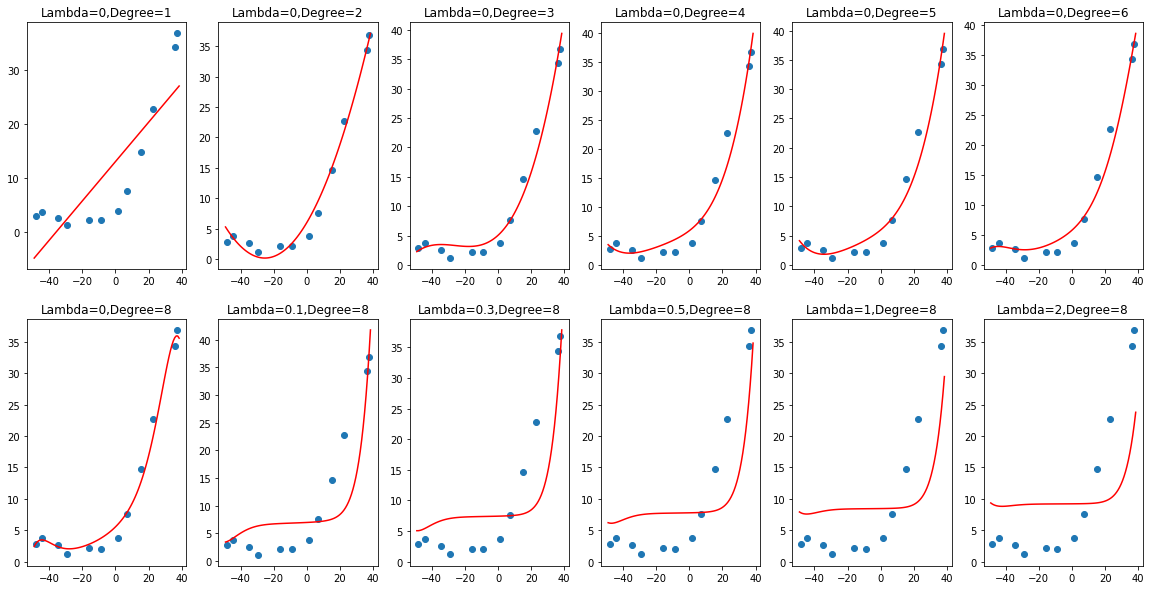

In [9]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,10))
regLambdaList=[0,0,0,0,0,0,0,0.1,0.3,0.5,1,2]
degreeList=[1,2,3,4,5,6,8,8,8,8,8,8]
for i in range(len(regLambdaList)):
    regLambda=regLambdaList[i]
    degree=degreeList[i]
   
    Xn, scaler = featureNormalize(X)  # Normalize
    Xp=mapFeature(Xn,degree)    #Polynomial
    
    weights=np.random.rand(Xp.shape[1], 1)
    alpha=0.001
    iter=5000
    #Without Lib   
    weights = gradientDescent(Xp, Y, weights,alpha,iter,degree,regLambda)
    plt.subplot(2 , int(len(regLambdaList)/2 +0.5), i+1)
    plotHypothesis(weights,X,Y,regLambda,scaler,degree)
plt.show()

# Plotting Learning Curve

In [10]:
def plotLearningCurve(Xtrain, ytrain, Xval, yval, degree,regLambda):
    m = len(Xtrain)
    
    Xtrain_n, scaler = featureNormalize(Xtrain)  # Normalize
    Xtrain_p=mapFeature(Xtrain_n,degree)    #Polynomial
    
    
    Xval_n=scaler.transform(Xval)  # Normalize
    Xval_p=mapFeature(Xval_n,degree)    #Polynomial
    
    
    training_error = np.zeros((m, 1))
    validation_error   = np.zeros((m, 1))

    for i in range(m):
        #Learning
        Current_Xtrain=Xtrain_p[0:i+1]
        Current_ytrain=ytrain[:i+1]
        weights=np.random.rand(Current_Xtrain.shape[1], 1)
        alpha=0.001
        iter=10000
        weights = gradientDescent(Current_Xtrain, Current_ytrain, weights,alpha,iter,degree,regLambda)
          
        training_error[i]=computeCost(weights,Current_Xtrain,Current_ytrain,0)
        validation_error[i]=computeCost(weights,Xval_p,yval,0)
    
    plt.plot(range(1,m+1), training_error)
    plt.plot( range(1,m+1), validation_error)
    plt.title('Learning Curve (Lambda = '+str(regLambda)+',Degree='+str(degree)+')')  
    plt.legend(('Training', 'Cross Validation'))   
    plt.xlabel("Training")
    plt.ylabel("Error/Cost")
    return


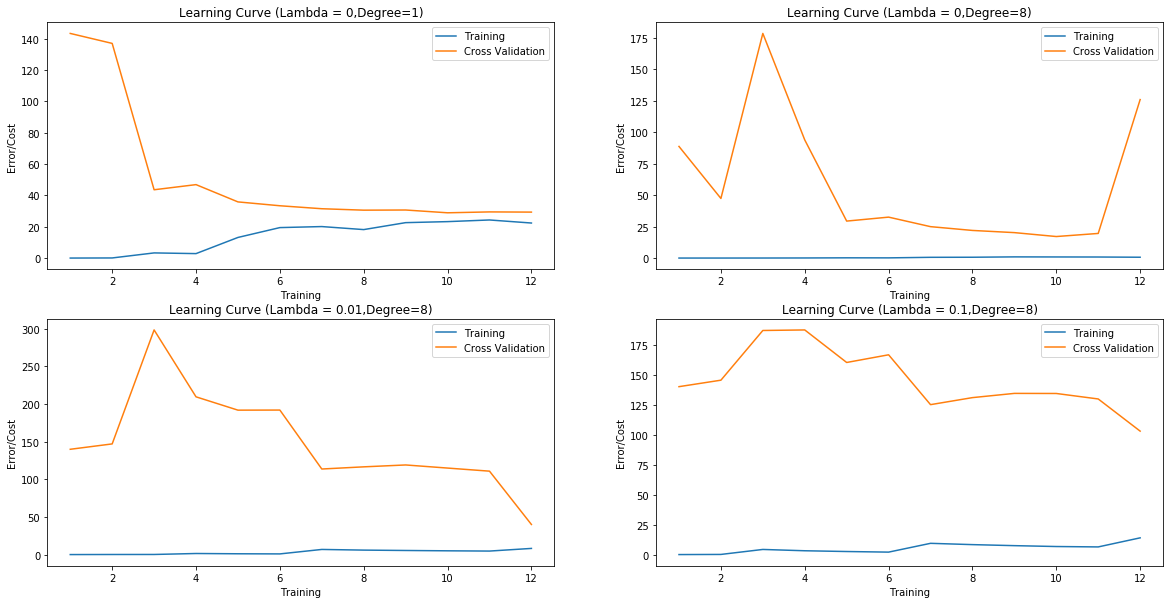

In [11]:
plt.figure(figsize=(20,10))
regLambdaList=[0,0,0.01,.1]
degreeList=[1,8,8,8]
for i in range(len(regLambdaList)):
    regLambda=regLambdaList[i]
    degree=degreeList[i]
    plt.subplot(2 , int(len(regLambdaList)/2 +0.5), i+1)
    plotLearningCurve(X,Y,Xval,Yval,degree,regLambda)
plt.show()

# Plotting Validation Curve

In [12]:
def plotValidationCurveForLambda(Xtrain, ytrain, Xval, yval, degree,regLambdaList):
    
    
    Xtrain_n, scaler= featureNormalize(Xtrain)  # Normalize
    Xtrain_p=mapFeature(Xtrain_n,degree)    #Polynomial
    
    Xval_n =scaler.transform(Xval)  # Normalize
    Xval_p=mapFeature(Xval_n,degree)    #Polynomial
    
    training_error = np.zeros((len(regLambdaList), 1))
    validation_error   = np.zeros((len(regLambdaList), 1))

    for i in range(len(regLambdaList)):
        regLambda=regLambdaList[i]
        
        weights=np.random.rand(Xtrain_p.shape[1], 1)
        alpha=0.001
        iter=10000
        weights = gradientDescent(Xtrain_p, ytrain, weights,alpha,iter,degree,regLambda)
        
        training_error[i]=computeCost(weights,Xtrain_p,ytrain,0)
        validation_error[i]=computeCost(weights,Xval_p,yval,0)
    
    plt.plot(regLambdaList, training_error)
    plt.plot( regLambdaList, validation_error)
    plt.title('Validation Curve (Degree='+str(degree)+')')  
    plt.legend(('Training', 'Cross Validation'))   
    plt.xlabel("Lambda")
    plt.ylabel("Error/Cost")
    return

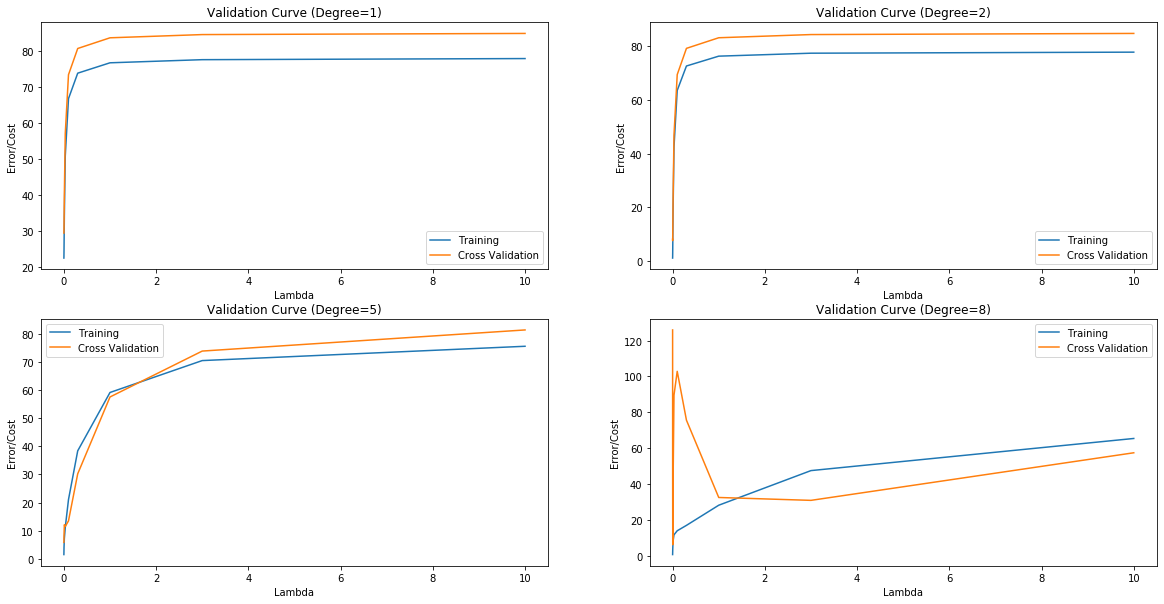

In [13]:
plt.figure(figsize=(20,10))
degreeList=[1,2,5,8]
regLambdaList=[0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
for i in range(len(degreeList)):
    degree=degreeList[i]
    plt.subplot(2 , int(len(degreeList)/2 +0.5), i+1)
    plotValidationCurveForLambda(X,Y,Xval,Yval,degree,regLambdaList)
plt.show()

# Final Plot and Test Error

In [14]:
def plotFinalCurve(Xtrain, ytrain, Xtest, ytest, degree,regLambda):
    Xn, scaler = featureNormalize(Xtrain)  # Normalize
    Xp=mapFeature(Xn,degree)    #Polynomial
    

    weights=np.random.rand(Xp.shape[1], 1)
    alpha=0.001
    iter=10000
    weights = gradientDescent(Xp, ytrain, weights,alpha,iter,degree,regLambda)

      
    

    Xtest_n = scaler.transform(Xtest)
    Xtest_p=mapFeature(Xtest_n,degree)    #Polynomial
    
    testErr=computeCost(weights,Xtest_p,ytest,0)
    #PLOT   
    X=np.concatenate((Xtrain,Xtest),axis=0)
    y=np.concatenate((ytrain,ytest),axis=0)
    x_min, x_max = X[:, 0].min()-1 , X[:, 0].max()+1 
    u = np.linspace(x_min, x_max, 100)
    u.shape=(len(u),1) 
    v=predict(weights,u,scaler,degree) 
    plt.plot(u, v,color='r')
    plt.scatter(Xtrain,ytrain) 
    plt.scatter(Xtest,ytest)
    plt.title("Test data Lambda="+str(regLambda ) +" , degree="+str(degree)+" with Error="+str(round(testErr,4)))
    plt.legend(("Regression(Lambda="+ str(regLambda )+",degree="+str(degree)+")","Training Data","Test Data"))
    return

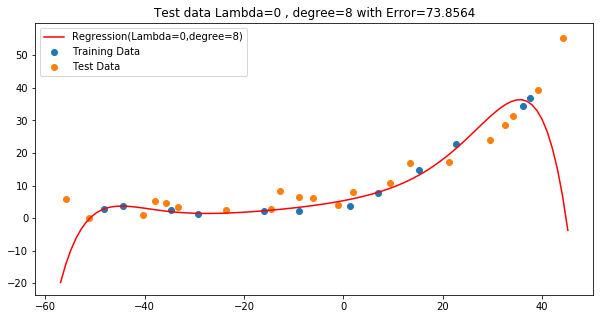

In [15]:
plt.figure(figsize=(10,5))
degree=8
regLambda=0
plotFinalCurve(X,Y,Xtest,Ytest,degree,regLambda)
plt.show()